In [1]:
import os
import pandas as pd
import nltk
import gensim
from gensim import corpora, models, similarities

C:\Users\kumara213\AppData\Local\Continuum\anaconda2\envs\py35\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
df=pd.read_csv('C:\\Users\\kumara213\\question-answer-jokes\\jokes.csv')
df.head()
df_x=df['Question'].values.tolist()
df_y=df['Answer'].values.tolist()
corpus=df_x + df_y
print (df_x)

['Did you hear about the Native American man that drank 200 cups of tea?', "What's the best anti diarrheal prescription?", 'What do you call a person who is outside a door and has no arms nor legs?', 'Which Star Trek character is a member of the magic circle?', "What's the difference between a bullet and a human?", 'Why was the Ethiopian baby crying?', "What's the difference between a corn husker with epilepsy and a hooker with dysentery?", "Who is 2016's biggest sellout?", "Why is little Annie's shoe floating in the sea?", "What's the difference between a married man and a bachelor?", 'Why are there so many blood cells in female prisons?', 'What do you call a russian tree?', 'How do you call it when an egg is on point?', "Where'd the dog who lost his tail go to get a new one?", "What's the difference between an epileptic oyster shucker and a hooker with diarrhea?", 'Did you hear about the oyster who went to the ball?', 'Why are frogs so happy?', 'How do you turn an Indian woman on?', 

In [4]:
tok_corp= [nltk.word_tokenize(sent) for sent in corpus]


In [5]:
tok_corp

[['Did',
  'you',
  'hear',
  'about',
  'the',
  'Native',
  'American',
  'man',
  'that',
  'drank',
  '200',
  'cups',
  'of',
  'tea',
  '?'],
 ['What', "'s", 'the', 'best', 'anti', 'diarrheal', 'prescription', '?'],
 ['What',
  'do',
  'you',
  'call',
  'a',
  'person',
  'who',
  'is',
  'outside',
  'a',
  'door',
  'and',
  'has',
  'no',
  'arms',
  'nor',
  'legs',
  '?'],
 ['Which',
  'Star',
  'Trek',
  'character',
  'is',
  'a',
  'member',
  'of',
  'the',
  'magic',
  'circle',
  '?'],
 ['What',
  "'s",
  'the',
  'difference',
  'between',
  'a',
  'bullet',
  'and',
  'a',
  'human',
  '?'],
 ['Why', 'was', 'the', 'Ethiopian', 'baby', 'crying', '?'],
 ['What',
  "'s",
  'the',
  'difference',
  'between',
  'a',
  'corn',
  'husker',
  'with',
  'epilepsy',
  'and',
  'a',
  'hooker',
  'with',
  'dysentery',
  '?'],
 ['Who', 'is', '2016', "'s", 'biggest', 'sellout', '?'],
 ['Why',
  'is',
  'little',
  'Annie',
  "'s",
  'shoe',
  'floating',
  'in',
  'the',
  'se

min_count=1 -the threshold value for the words. Word with frequency greater than this only are going to be included into the model.
size=300 – the number of dimensions in which we wish to represent our word. This is the size of the word vector.

In [4]:
model = gensim.models.Word2Vec(tok_corp, min_count=1,window=2,size = 32)

In [5]:
model.save('testmodel')#saving the model ,so that it can be used again in future.

In [6]:
model = gensim.models.Word2Vec.load('testmodel')#Again loading the model.

In [7]:
a1=model.most_similar('American')
print (a1)

[('Italian', 0.9382006525993347), ('obese', 0.9343132972717285), ('hillbilly', 0.9331984519958496), ('asian', 0.9326031804084778), ('pessimist', 0.9279963970184326), ('Muslim', 0.9263047575950623), ('Australian', 0.9248255491256714), ('Eskimo', 0.9228663444519043), ('astronaut', 0.9225165247917175), ('pony', 0.9202181100845337)]


C:\Users\kumara213\AppData\Local\Continuum\anaconda2\envs\py35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [8]:
model.similarity('woman','man')

C:\Users\kumara213\AppData\Local\Continuum\anaconda2\envs\py35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.9490902502163073

In [9]:
model.most_similar(positive=['woman','king'],negative=['man'],topn=1)

C:\Users\kumara213\AppData\Local\Continuum\anaconda2\envs\py35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('T-rex', 0.9483879208564758)]

In [10]:
sentence=[["apple","fruit"],["mango","fruit"],["apple","sweet"]]

In [11]:
#training word2vec on 3 sentences
train_model = gensim.models.Word2Vec(sentence, min_count=1,size=300,workers=4)
#sentence – list of list of our corpus
#min_count=1 -the threshold value for the words. Word with frequency greater than this only are going to be included into the model.
#size=300 – the number of dimensions in which we wish to represent our word. This is the size of the word vector.
#workers=4 – used for parallelization

In [12]:
print(train_model.similarity('apple', 'fruit'))

0.07897209741434337


C:\Users\kumara213\AppData\Local\Continuum\anaconda2\envs\py35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


In [13]:
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
import numpy as np

In [14]:
tsne = TSNE(n_components=2, random_state=0)
all_word_vectors_matrix = model.wv.syn0

C:\Users\kumara213\AppData\Local\Continuum\anaconda2\envs\py35\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


In [15]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [16]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[model.wv.vocab[word].index])
            for word in model.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [17]:
points.head(10)

,word,x,y
0,offended,-27.387125,-18.977152
1,.He,5.294374,-5.249240
2,chasing,-18.275002,-24.881458
3,expecting,-9.191822,-18.601048
4,great.,1.546927,7.519934
5,Caligula,22.281410,24.477810
6,bartender,-39.556660,-12.163691
7,joking,-13.511531,-35.262089
8,handcuffed,28.979616,6.479008
9,bodies,-29.990330,-21.653971


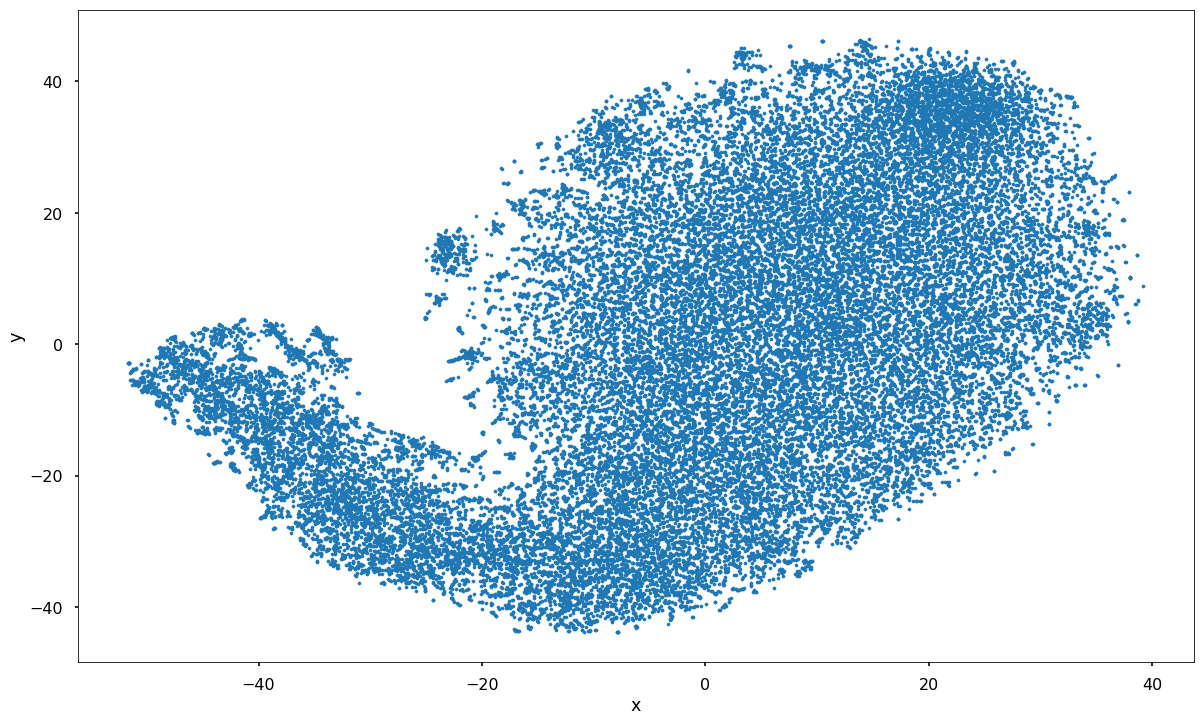

In [18]:
import seaborn as sns
sns.set_context("poster")
points.plot.scatter("x", "y", s=10, figsize=(20, 12))